

---
# Muhammad Iqbal Fathur Rohman


```
NIM : 2106184
```


---




In [11]:
# Base Classes
# PREDICATE - ON, ONTABLE, CLEAR, HOLDING, ARMEMPTY
class PREDICATE:
 def __str__(self):
  pass
 def __repr__(self):
  pass
 def __eq__(self, other):
  pass
 def __hash__(self):
  pass
 def get_action(self, world_state):
  pass
# OPERATIONS - Stack, Unstack, Pickup, Putdown
class Operation:
 def __str__(self):
  pass
 def __repr__(self):
  pass
 def __eq__(self, other):
  pass
 def precondition(self):
  pass
 def delete(self):
  pass
 def add(self):
  pass
class ON(PREDICATE):
 def __init__(self, X, Y):
  self.X = X
  self.Y = Y
 def __str__(self):
  return "ON({X},{Y})".format(X=self.X, Y=self.Y)
 def __repr__(self):
  return self.__str__()
 def __eq__(self, other):
  return self.__dict__ == other.__dict__ and self.__class__ == other.__class__
 def __hash__(self):
  return hash(str(self))
 def get_action(self, world_state):
  return StackOp(self.X, self.Y)
class ONTABLE(PREDICATE):
 def __init__(self, X):
  self.X = X
 def __str__(self):
  return "ONTABLE({X})".format(X=self.X)
 def __repr__(self):
  return self.__str__()
 def __eq__(self, other):
  return self.__dict__ == other.__dict__ and self.__class__ == other.__class__
 def __hash__(self):
  return hash(str(self))
 def get_action(self, world_state):
  return PutdownOp(self.X)
class CLEAR(PREDICATE):
 def __init__(self, X):
  self.X = X
 def __str__(self):
  return "CLEAR({X})".format(X=self.X)
  self.X = X
 def __repr__(self):
  return self.__str__()
 def __eq__(self, other):
  return self.__dict__ == other.__dict__ and self.__class__ == other.__class__
 def __hash__(self):
  return hash(str(self))
 def get_action(self, world_state):
  for predicate in world_state:
    # If Block is on another block, unstack
    if isinstance(predicate, ON) and predicate.Y == self.X:
      return UnstackOp(predicate.X, predicate.Y)
  return None
class HOLDING(PREDICATE):
 def __init__(self, X):
  self.X = X
 def __str__(self):
  return "HOLDING({X})".format(X=self.X)
 def __repr__(self):
  return self.__str__()
 def __eq__(self, other):
  return self.__dict__ == other.__dict__ and self.__class__ == other.__class__
 def __hash__(self):
  return hash(str(self))
 def get_action(self, world_state):
  X = self.X
  # If block is on table, pick up
  if ONTABLE(X) in world_state:
    return PickupOp(X)
  # If block is on another block, unstack
  else:
    for predicate in world_state:
      if isinstance(predicate, ON) and predicate.X == X:
        return UnstackOp(X, predicate.Y)
class ARMEMPTY(PREDICATE):
 def __init__(self):
  pass
 def __str__(self):
  return "ARMEMPTY"
 def __repr__(self):
  return self.__str__()
 def __eq__(self, other):
  return self.__dict__ == other.__dict__ and self.__class__ == other.__class__
 def __hash__(self):
  return hash(str(self))
 def get_action(self, world_state=[]):
  for predicate in world_state:
    if isinstance(predicate, HOLDING):
      return PutdownOp(predicate.X)
  return None
class StackOp(Operation):
 def __init__(self, X, Y):
  self.X = X
  self.Y = Y
 def __str__(self):
  return "STACK({X},{Y})".format(X=self.X, Y=self.Y)
 def __repr__(self):
  return self.__str__()
 def __eq__(self, other):
  return self.__dict__ == other.__dict__ and self.__class__ == other.__class__
 def precondition(self):
  return [CLEAR(self.Y), HOLDING(self.X)]
 def delete(self):
  return [CLEAR(self.Y), HOLDING(self.X)]
 def add(self):
  return [ARMEMPTY(), ON(self.X, self.Y)]
class UnstackOp(Operation):
 def __init__(self, X, Y):
  self.X = X
  self.Y = Y
 def __str__(self):
  return "UNSTACK({X},{Y})".format(X=self.X, Y=self.Y)
 def __repr__(self):
  return self.__str__()
 def __eq__(self, other):
  return self.__dict__ == other.__dict__ and self.__class__ == other.__class__
 def precondition(self):
  return [ARMEMPTY(), ON(self.X, self.Y), CLEAR(self.X)]
 def delete(self):
  return [ARMEMPTY(), ON(self.X, self.Y)]
 def add(self):
  return [CLEAR(self.Y), HOLDING(self.X)]
class PickupOp(Operation):
 def __init__(self, X):
  self.X = X
 def __str__(self):
  return "PICKUP({X})".format(X=self.X)
 def __repr__(self):
  return self.__str__()
 def __eq__(self, other):
  return self.__dict__ == other.__dict__ and self.__class__ == other.__class__
 def precondition(self):
  return [CLEAR(self.X), ONTABLE(self.X), ARMEMPTY()]
 def delete(self):
  return [ARMEMPTY(), ONTABLE(self.X)]
 def add(self):
  return [HOLDING(self.X)]
class PutdownOp(Operation):
 def __init__(self, X):
  self.X = X
 def __str__(self):
  return "PUTDOWN({X})".format(X=self.X)
 def __repr__(self):
  return self.__str__()
 def __eq__(self, other):
  return self.__dict__ == other.__dict__ and self.__class__ == other.__class__
 def precondition(self):
  return [HOLDING(self.X)]
 def delete(self):
  return [HOLDING(self.X)]
 def add(self):
  return [ARMEMPTY(), ONTABLE(self.X)]
def isPredicate(obj):
  predicates = [ON, ONTABLE, CLEAR, HOLDING, ARMEMPTY]
  for predicate in predicates:
    if isinstance(obj, predicate):
      return True
  return False
def isOperation(obj):
  operations = [StackOp, UnstackOp, PickupOp, PutdownOp]
  for operation in operations:
    if isinstance(obj, operation):
      return True
  return False
def arm_status(world_state):
  for predicate in world_state:
    if isinstance(predicate, HOLDING):
      return predicate
  return ARMEMPTY()
class GoalStackPlanner:
 def __init__(self, initial_state, goal_state):
  self.initial_state = initial_state
  self.goal_state = goal_state
 def get_steps(self):
  # Store Steps
  steps = []
  # Program Stack
  stack = []
  # World State/Knowledge Base
  world_state = self.initial_state.copy()
  # Initially push the goal_state as compound goal onto the stack
  stack.append(self.goal_state.copy())
  # Repeat until the stack is empty
  while len(stack) != 0:
    # Get the top of the stack
    stack_top = stack[-1]
    # If Stack Top is Compound Goal, push its unsatisfied goals onto stack
    if type(stack_top) is list:
      compound_goal = stack.pop()
      for goal in compound_goal:
        if goal not in world_state:
          stack.append(goal)
    # If Stack Top is an action
    elif isOperation(stack_top):
      # Peek the operation
      operation = stack[-1]
      all_preconditions_satisfied = True
      # Check if any precondition is unsatisfied and push it onto program stack
      for predicate in operation.delete():
        if predicate not in world_state:
          all_preconditions_satisfied = False
          stack.append(predicate)
      # If all preconditions are satisfied, pop operation from stack and execute it
      if all_preconditions_satisfied:
        stack.pop()
        steps.append(operation)
        for predicate in operation.delete():
          world_state.remove(predicate)
        for predicate in operation.add():
          world_state.append(predicate)
        # If Stack Top is a single satisfied goal
    elif stack_top in world_state:
      stack.pop()
    # If Stack Top is a single unsatisfied goal
    else:
      unsatisfied_goal = stack.pop()
      # Replace Unsatisfied Goal with an action that can complete it
      action = unsatisfied_goal.get_action(world_state)
      stack.append(action)
      # Push Precondition on the stack
      for predicate in action.precondition():
        if predicate not in world_state:
          stack.append(predicate)
  return steps

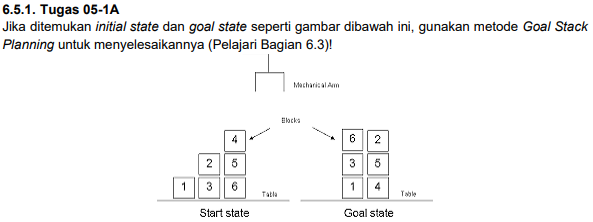

In [19]:
if __name__ == '__main__':
 initial_state = [
    ONTABLE('1'), ONTABLE('3'), ONTABLE('6'),
    ON('2','3'), ON('5','6'), ON('4','5'), 
    CLEAR('1'), CLEAR('2'), CLEAR('4'),
    ARMEMPTY()
 ]
 goal_state = [
    ONTABLE('1'), ONTABLE('4'),
    ON('3','1'), ON('5','4'), ON('6','3'), ON('2','5'),
    CLEAR('6'), CLEAR('2'),
    ARMEMPTY()
 ]
 goal_stack = GoalStackPlanner(initial_state=initial_state, goal_state=goal_state)
 steps = goal_stack.get_steps()
 print(steps)

[UNSTACK(4,5), PUTDOWN(4), UNSTACK(5,6), PUTDOWN(5), UNSTACK(2,3), STACK(2,5), PICKUP(6), STACK(6,3), UNSTACK(2,5), PUTDOWN(2), PICKUP(5), STACK(5,4), UNSTACK(6,3), PUTDOWN(6), PICKUP(3), STACK(3,1)]


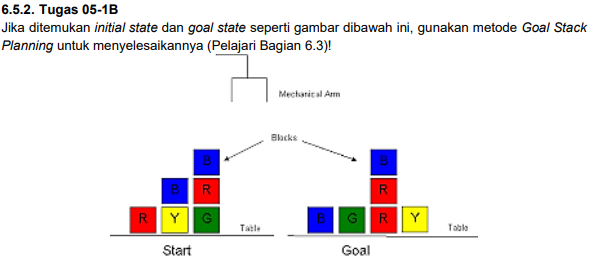

In [24]:
if __name__ == '__main__':
 initial_state = [
    ONTABLE('R1'), ONTABLE('Y'), ONTABLE('G'),
    ON('B1','Y'), ON('R2','G'), ON('B2','R2'), 
    CLEAR('R1'), CLEAR('B1'), CLEAR('B2'),
    ARMEMPTY()
 ]
 goal_state = [
    ONTABLE('B1'), ONTABLE('G'), ONTABLE('R1'), ONTABLE('Y'),
    ON('R2','R1'), ON('B2','R2'), 
    CLEAR('B1'), CLEAR('G'), CLEAR ('B2'), CLEAR ('Y'),
    ARMEMPTY()
 ]
 goal_stack = GoalStackPlanner(initial_state=initial_state, goal_state=goal_state)
 steps = goal_stack.get_steps()
 print(steps)

[UNSTACK(B1,Y), PUTDOWN(B1), UNSTACK(B2,R2), PUTDOWN(B2), UNSTACK(R2,G), STACK(R2,R1)]


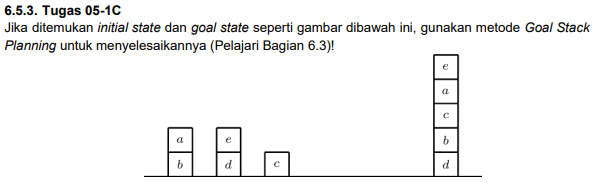

In [28]:
if __name__ == '__main__':
 initial_state = [
    ONTABLE('b'), ONTABLE('d'), ONTABLE('c'),
    ON('a','b'), ON('e','d'), 
    CLEAR('a'), CLEAR('e'), CLEAR('c'),
    ARMEMPTY()
 ]
 goal_state = [
    ONTABLE('d'),
    ON('b','d'), ON('c','d'), ON('a','c'), ON('e','a'),
    CLEAR('e'),
    ARMEMPTY()
 ]
 goal_stack = GoalStackPlanner(initial_state=initial_state, goal_state=goal_state)
 steps = goal_stack.get_steps()
 print(steps)

[UNSTACK(e,d), STACK(e,a), UNSTACK(e,a), PUTDOWN(e), UNSTACK(a,b), STACK(a,c), UNSTACK(a,c), PUTDOWN(a), PICKUP(c), STACK(c,d), PICKUP(b), PUTDOWN(b), UNSTACK(c,d), PUTDOWN(c), PICKUP(b), STACK(b,d)]
